In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm,tree
from sklearn.preprocessing import Normalizer

In [2]:
img = cv2.imread("HandRecongnition/training/training/A408.jpg")
mask = cv2.imread("HandRecongnition/training/GTtraining/A408.jpg")

yCbCr_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCR_CB) #rgb2ycrcb
yCbCr_img = yCbCr_img[2:197,2:197,:] #fix size

In [3]:
#extract features
X_train = np.zeros((195*195,3))
X_train[:,0]=yCbCr_img[:,:,0].flatten()
X_train[:,1]=yCbCr_img[:,:,1].flatten()
X_train[:,2]=yCbCr_img[:,:,2].flatten()

y_train = mask[:,:,0].flatten().T

#normalize features
X_train = Normalizer().fit_transform(X_train)

#Decision Tree
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

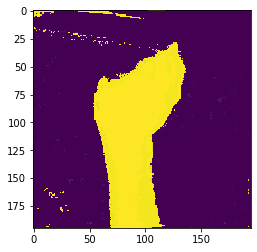

In [4]:
img_t = cv2.imread("HandRecongnition/training/training/A4.jpg")

yCbCr_img_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2YCR_CB)
yCbCr_img_t = yCbCr_img_t[2:197,2:197,:]

X_test = np.zeros((195*195,3))
X_test[:,0]=yCbCr_img_t[:,:,0].flatten()
X_test[:,1]=yCbCr_img_t[:,:,1].flatten()
X_test[:,2]=yCbCr_img_t[:,:,2].flatten()

X_test = Normalizer().fit_transform(X_test)

pred = clf.predict(X_test)
mask_t = pred.reshape(195,195)
plt.imshow(mask_t)
plt.show()

score:  0.8775805391190007


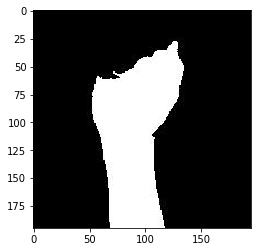

In [5]:
#to get score
mask_t = cv2.imread("HandRecongnition/training/GTtraining/A4.jpg")
y_test = mask_t[:,:,0].flatten().T
print("score: ",clf.score(X_test,y_test))

mask = cv2.imread("HandRecongnition/training/GTtraining/A4.jpg")
plt.imshow(mask)
plt.show()